In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🧩 Dataset 3: *Netflix Titles Dataset*

## Data Reading

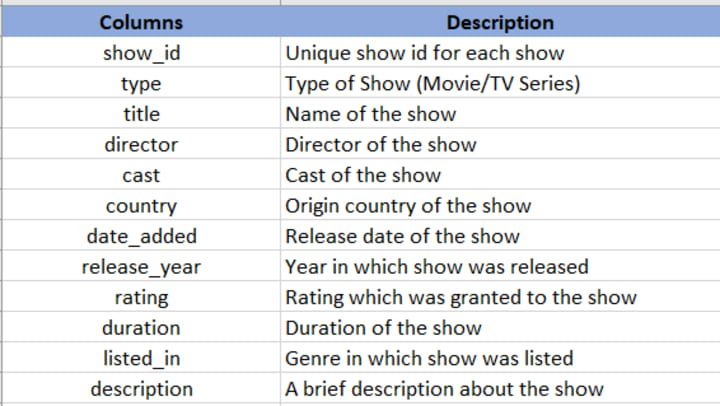

In [101]:
netflix_dataset = pd.read_csv('../data/netflix_titles.csv', index_col='show_id', parse_dates=['date_added'])
netflix_dataset.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [102]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [103]:
netflix_dataset.describe(include='all')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [104]:
netflix_dataset.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [105]:
netflix_dataset.duplicated().sum()

np.int64(0)

### Handling missing values
* fill director with Unknown because we should not fill the director by most frequent
* fill cast with Unknown because we should not fill the cast by most frequent
* remove the rows where date_added is NaN
* fill country with most frequent
* rating with first get the listed_in of NaN ratings and get mode of that rows

In [106]:
netflix_dataset['director'].fillna('Unknown', inplace=True)
netflix_dataset['cast'].fillna('Unknown', inplace=True)

C:\Users\bvkir\AppData\Local\Temp\ipykernel_19016\1661246178.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_dataset['director'].fillna('Unknown', inplace=True)
C:\Users\bvkir\AppData\Local\Temp\ipykernel_19016\1661246178.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [107]:
netflix_dataset['country'].fillna(netflix_dataset['country'].mode()[0], inplace=True)

C:\Users\bvkir\AppData\Local\Temp\ipykernel_19016\688547909.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_dataset['country'].fillna(netflix_dataset['country'].mode()[0], inplace=True)


In [108]:
netflix_dataset.dropna(subset=['date_added'], inplace=True)
netflix_dataset.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [109]:
len(netflix_dataset['listed_in'].unique())

513

In [110]:
netflix_dataset.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [111]:
NaN_data_rating = netflix_dataset[pd.isnull(netflix_dataset['rating'])]
NaN_data_rating

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown,"Oprah Winfrey, Ava DuVernay",United States,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
s6828,TV Show,Gargantia on the Verdurous Planet,Unknown,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
s7313,TV Show,Little Lunch,Unknown,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [112]:
for index, row in NaN_data_rating.iterrows():
    print(index )
    print(type(index))
    print(type(row))
    print(row, '===========================================================================')

s5990
<class 'str'>
<class 'pandas.core.series.Series'>
type                                                        Movie
title           13TH: A Conversation with Oprah Winfrey & Ava ...
director                                                  Unknown
cast                                  Oprah Winfrey, Ava DuVernay
country                                             United States
date_added                                       January 26, 2017
release_year                                                 2017
rating                                                        NaN
duration                                                   37 min
listed_in                                                  Movies
description     Oprah Winfrey sits down with director Ava DuVe...
Name: s5990, dtype: object ===========================================================================
s6828
<class 'str'>
<class 'pandas.core.series.Series'>
type                                                      T

In [113]:
NaN_data_duration=netflix_dataset[pd.isnull(netflix_dataset['duration'])]
len(NaN_data_duration)

3

In [114]:
listed_in_groups_for_rating = netflix_dataset.groupby('listed_in')['rating'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'Not Rated')
listed_in_groups_for_duration = netflix_dataset.groupby('listed_in')['duration'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
for index, row in NaN_data_rating.iterrows():
    netflix_dataset.at[index, 'rating'] = listed_in_groups_for_rating[row['listed_in']]
for index, row in NaN_data_duration.iterrows():
    netflix_dataset.at[index, 'duration'] = listed_in_groups_for_duration[row['listed_in']]

netflix_dataset.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## feature engineering

### dates

In [115]:
netflix_dataset.at['s1', 'date_added']

'September 25, 2021'

In [116]:
netflix_dataset.at['s1', 'date_added'].split(',')[1].strip()

'2021'

In [117]:
netflix_dataset.at['s1', 'date_added'].split(',')[0].split(' ')[0]

'September'

In [118]:
netflix_dataset.at['s1', 'date_added'].split(',')[0].split(' ')[1]

'25'

In [119]:
def func_year(date_added):
    return date_added.split(',')[1].strip()
netflix_dataset['added_year'] = netflix_dataset['date_added'].apply(func_year)

def func_month(date_added):
    return date_added.split(',')[0].split(' ')[0]
netflix_dataset['added_month'] = netflix_dataset['date_added'].apply(func_month)

def func_date(date_added):
    return date_added.split(',')[0].split(' ')[1]
netflix_dataset['added_date'] = netflix_dataset['date_added'].apply(func_date)
netflix_dataset.head(1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_date
show_id,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,25


### Country

In [120]:
netflix_dataset['country'].value_counts()

country
United States                                    3642
India                                             972
United Kingdom                                    418
Japan                                             244
South Korea                                       199
                                                 ... 
Russia, Spain                                       1
Croatia, Slovenia, Serbia, Montenegro               1
Japan, Canada                                       1
United States, France, South Korea, Indonesia       1
United Arab Emirates, Jordan                        1
Name: count, Length: 748, dtype: int64

In [131]:
country_min_30_count = []
for country, count in netflix_dataset['country'].value_counts().items():
    if count >= 30:
        country_min_30_count.append(country)
    else:
        break

### keeping the rows which country values count >= 30

In [136]:
netflix_dataset_country_30 = netflix_dataset[netflix_dataset['country'].isin(country_min_30_count)]
len(netflix_dataset_country_30)

7392

In [138]:
netflix_dataset_country_30['country'].unique()

array(['United States', 'South Africa', 'India', 'United Kingdom',
       'Mexico', 'Turkey', 'Australia', 'Nigeria', 'Japan', 'France',
       'United Kingdom, United States', 'United States, United Kingdom',
       'South Korea', 'Spain', 'United States, Canada', 'Canada',
       'Hong Kong', 'Italy', 'Argentina', 'Colombia',
       'Canada, United States', 'Brazil', 'Taiwan', 'Germany', 'Thailand',
       'Indonesia', 'Egypt', 'China', 'Philippines'], dtype=object)

In [157]:
top_10_countries = []
top_10_countries_count =[]
counter = 0
for country, count in netflix_dataset['country'].value_counts().items():
    if counter < 10:
        top_10_countries.append(country)
        top_10_countries_count.append(count)
    else:
        break
    counter += 1
len(top_10_countries)

10

In [ ]:
all_countries = []
all_countries_count =[]
counter = 0
for country, count in netflix_dataset['country'].value_counts().keys():
    all_countries.append(country)
    all_countries_count.append(count)

In [152]:
netflix_dataset_country_top_10 = netflix_dataset[netflix_dataset['country'].isin(top_10_countries)]
len(netflix_dataset_country_top_10)

6141

## visualization

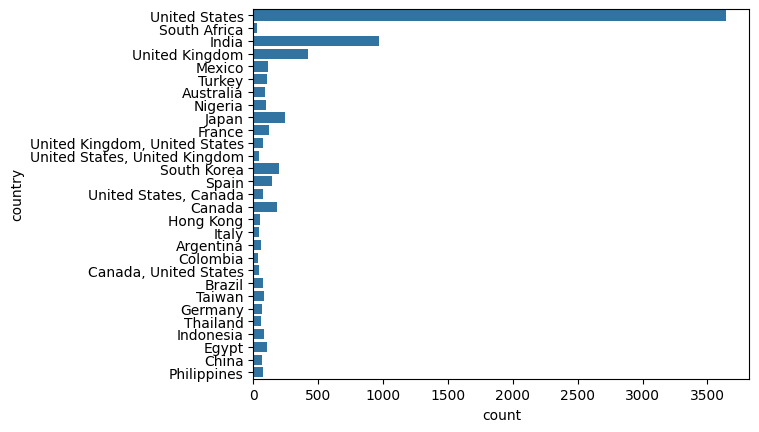

<Figure size 5000x500 with 0 Axes>

In [153]:
sns.countplot(netflix_dataset_country_30, y='country')
plt.figure(figsize=(50,5))
plt.show()

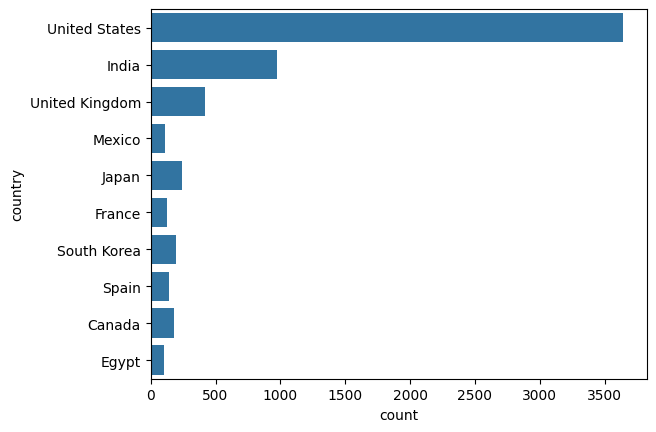

<Figure size 5000x500 with 0 Axes>

In [158]:
sns.countplot(netflix_dataset_country_top_10, y='country')
plt.figure(figsize=(50,5))
plt.show()

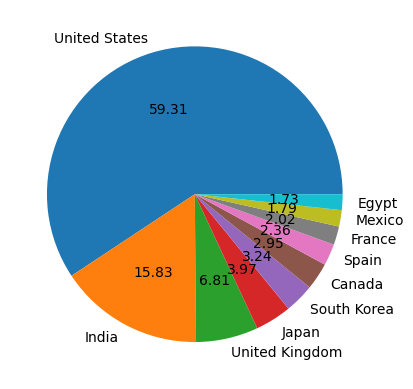

In [160]:
plt.pie(x=top_10_countries_count, labels=top_10_countries, autopct="%.2f")
plt.show()

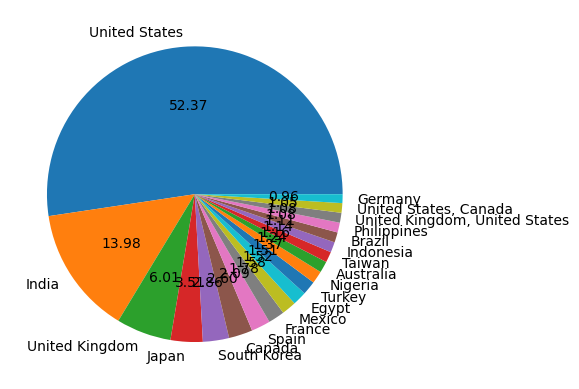

In [178]:
plt.pie(
    x=list(netflix_dataset['country'].value_counts().values)[:20], 
    labels=list(netflix_dataset['country'].value_counts().keys())[:20], 
    autopct="%.2f", 
    )
plt.show()

## number of releases per year, month

In [181]:
netflix_dataset.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_year', 'added_month', 'added_date'],
      dtype='object')

In [183]:
netflix_dataset['added_year'].value_counts()

added_year
2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: count, dtype: int64

<Axes: xlabel='added_year', ylabel='count'>

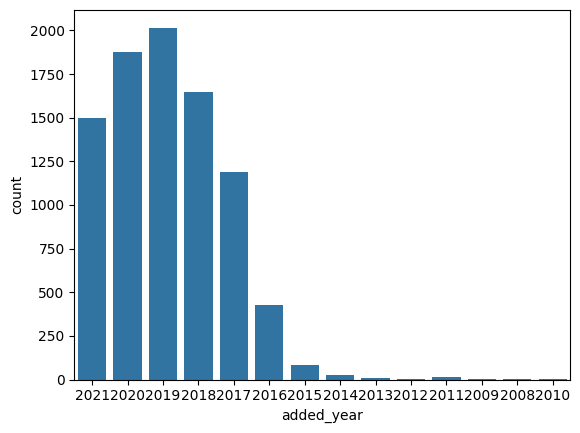

In [184]:
sns.countplot(netflix_dataset, x='added_year')

<Axes: xlabel='count', ylabel='added_month'>

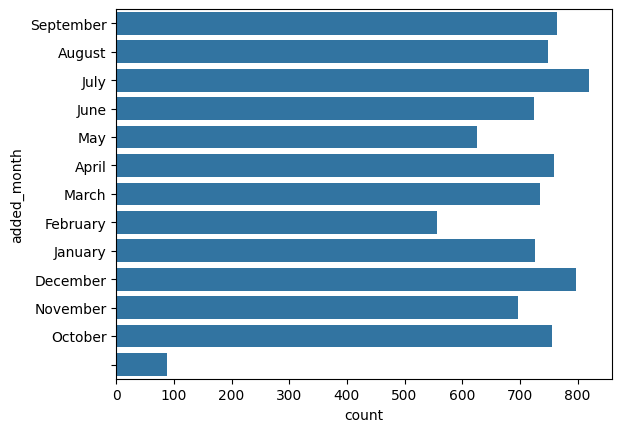

In [186]:
sns.countplot(netflix_dataset, y='added_month')

## type

In [187]:
netflix_dataset['type'].value_counts()

type
Movie      6131
TV Show    2666
Name: count, dtype: int64

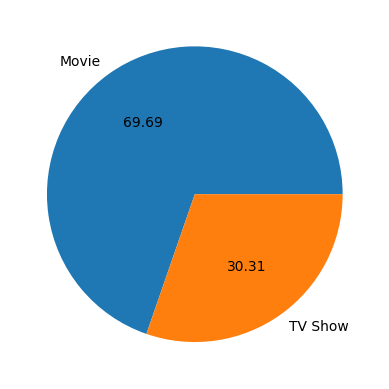

In [189]:
plt.pie(
    x=list(netflix_dataset['type'].value_counts().values), 
    labels=list(netflix_dataset['type'].value_counts().keys()), 
    autopct="%.2f",
)
plt.show()

## directors and listed_in

In [198]:
len((netflix_dataset['listed_in'].value_counts()))

513

In [199]:
group_directors_listed_in = netflix_dataset.groupby(by='director')
group_directors_listed_in.groups

{'A. L. Vijay': ['s3538', 's6079'], 'A. Raajdheep': ['s2390'], 'A. Salaam': ['s5550'], 'A.R. Murugadoss': ['s4050', 's4682'], 'Aadish Keluskar': ['s3603'], 'Aamir Bashir': ['s5768'], 'Aamir Khan': ['s1023'], 'Aanand Rai': ['s2291'], 'Aaron Burns': ['s7375'], 'Aaron Hancox, Michael McNamara': ['s6435'], 'Aaron Hann, Mario Miscione': ['s5893'], 'Aaron Lieber': ['s2779'], 'Aaron Nee, Adam Nee': ['s6227'], 'Aaron Sorkin': ['s1843', 's7480'], 'Aaron Woodley': ['s2563'], 'Aatmaram Dharne': ['s6440'], 'Abba T. Makama': ['s2049', 's6898'], 'Abbas Alibhai Burmawalla, Mastan Alibhai Burmawalla': ['s2286', 's4602', 's6108', 's7213'], 'Abbas Mustan': ['s2075'], 'Abbas Tyrewala': ['s1019'], 'Abby Epstein': ['s3829'], 'Abdellatif Kechiche': ['s6339'], 'Abdul Aziz Hashad': ['s6532'], 'Abdulaziz Alshlahei': ['s437'], 'Abel Ferrara': ['s8716'], 'Abhay Chopra': ['s4946'], 'Abhijeet Deshpande': ['s2017'], 'Abhijit Kokate, Srivinay Salian': ['s3730'], 'Abhijit Panse': ['s2327', 's2337'], 'Abhinay Deo': ['

In [200]:
len(group_directors_listed_in.groups)

4529

In [201]:
group_directors_listed_in.get_group('A. L. Vijay')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_date
show_id,,,,,,,,,,,,,,
s3538,Movie,Watchman,A. L. Vijay,"G.V. Prakash Kumar, Samyuktha Hegde, Suman, Ra...",India,"September 4, 2019",2019,TV-14,93 min,"Comedies, Dramas, International Movies","Rushing to pay off a loan shark, a young man b...",2019,September,4
s6079,Movie,Abhinetri,A. L. Vijay,"Tamannaah Bhatia, Prabhu Deva, Sonu Sood, Sapt...",India,"May 1, 2018",2016,TV-14,131 min,"Comedies, International Movies, Sci-Fi & Fantasy","Due to family pressure, a corporate man reluct...",2018,May,1


In [202]:
from wordcloud import WordCloud

In [204]:
text = " ".join(group_directors_listed_in.get_group('A. L. Vijay')['listed_in'])
text

'Comedies, Dramas, International Movies Comedies, International Movies, Sci-Fi & Fantasy'

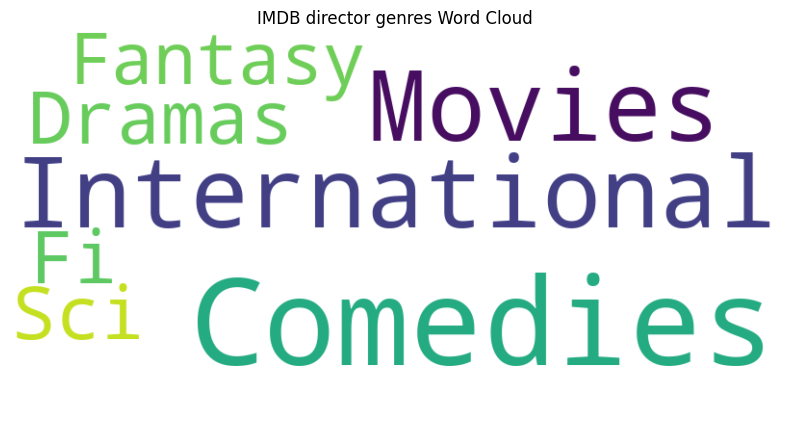

In [205]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("IMDB director genres Word Cloud")
plt.show()